In [1]:
import sys
import ipywidgets as widgets

sys.path.append("/Users/octavia/Dropbox/SVE_v2/utilities")
sys.path.append("/Users/octavia/Dropbox/SVE_v2/model")

my_modules = ['plot_functions','load_model_output', 'search_functions', 
              'plot_3D_functions', 'input_veg']
for mod in my_modules:
    if mod in sys.modules: 
        del sys.modules[mod]

from plot_functions import *
from plot_3D_functions import *
from search_functions import *
from load_model_output import *
from input_veg import *

No matched hydrographs here


In [2]:
project_dir = "/Users/octavia/Dropbox/SVE_v2/" 

## Chose a case


In [3]:
dirs = os.listdir(os.path.join(project_dir , 'model_output/'))
dirs = list(set(dirs) - {'.DS_Store'})
dirs = [d for d in dirs if "topo" in d]
# dirs = np.sort(dirs)
select_base_name = widgets.Dropdown(
    options=dirs,
    description='base_name:',
    disabled=False,
)
select_base_name

Dropdown(description='base_name:', options=('test_topo', 'test_topo_flat', 'test_topo_gauss'), value='test_top…

In [4]:
base_name = select_base_name.value
base_dir = os.path.join(project_dir, 'model_output', base_name )
print(base_name)
print_input_params(base_dir, [ 'Lx', 'Ly', 'tr', 'dt_print', "tmax_scale"])

test_topo_flat
batch:
	dt_sw : 0.001
sim:
	m_sigma : 2, 1
	m_So : 0.1, 0.01
	m_edge : 20, 10
common:
	H_i : 0.0
	Lx : 100
	Ly : 100
	tr : 5
	dt_print : 10
	tmax_scale : 4


In [5]:
core = load_sims(base_dir)


In [9]:
core.index

Index(['dt_sw-0.001/m_So-10,m_edge-20,m_sigma-2/',
       'dt_sw-0.001/m_So-0.1,m_edge-20,m_sigma-2/',
       'dt_sw-0.001/m_So-0.01,m_edge-20,m_sigma-1/',
       'dt_sw-0.001/m_So-0.01,m_edge-10,m_sigma-2/',
       'dt_sw-0.001/m_So-0.1,m_edge-10,m_sigma-1/',
       'dt_sw-0.001/m_So-0.1,m_edge-20,m_sigma-1/',
       'dt_sw-0.001/m_So-0.01,m_edge-20,m_sigma-2/',
       'dt_sw-0.001/m_So-0.01,m_edge-10,m_sigma-1/',
       'dt_sw-0.001/m_So-0.1,m_edge-10,m_sigma-2/'],
      dtype='object')

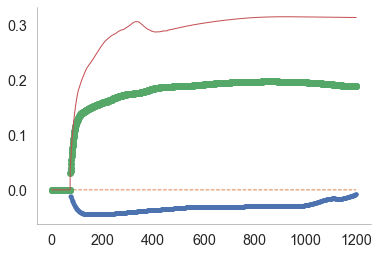

In [24]:
sim = core.loc["dt_sw-0.001/m_So-0.1,m_edge-10,m_sigma-1/"]

# sim = core.loc["dt_sw-0.001/m_edge-10,m_So-0.01,m_sigma-1/"]
plt.plot(sim.flux2, '.')
plt.plot(sim.flux3, '--')
plt.plot(sim.flux4, 'o')
plt.plot(sim.flux1, '-')

# plt.plot(sim.flux2, '--')
# plt.plot(sim.flux3, '--')
# plt.plot(sim.flux4, '--')
# plt.plot(sim.flux1)

In [15]:
core[['t_final', 'runtime_hr', 'early_exit']]

,t_final,runtime_hr,early_exit
"dt_sw-0.001/m_So-10,m_edge-20,m_sigma-2/",72.007,0.0648559,True
"dt_sw-0.001/m_So-0.1,m_edge-20,m_sigma-2/",1200,1.29543,False
"dt_sw-0.001/m_So-0.01,m_edge-20,m_sigma-1/",1200,1.27426,False
"dt_sw-0.001/m_So-0.01,m_edge-10,m_sigma-2/",1200,1.25886,False
"dt_sw-0.001/m_So-0.1,m_edge-10,m_sigma-1/",1200,1.33273,False
"dt_sw-0.001/m_So-0.1,m_edge-20,m_sigma-1/",1200,1.33407,False
"dt_sw-0.001/m_So-0.01,m_edge-20,m_sigma-2/",1200,1.2509,False
"dt_sw-0.001/m_So-0.01,m_edge-10,m_sigma-1/",1200,1.28133,False
"dt_sw-0.001/m_So-0.1,m_edge-10,m_sigma-2/",1200,1.29781,False


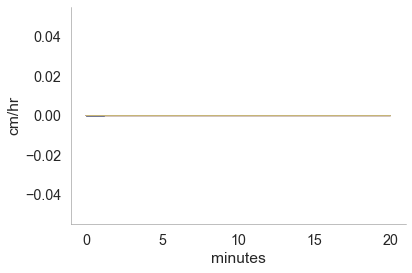

In [16]:
# core = core[core.early_exit == 0]
fig = plot_hydrographs(core)

In [39]:
sim = core.iloc[1]
sim.So

0.0

In [40]:
def plot_3D_micro(sim, plot_infl=False):
    """
    Plot veg pattern as surface
    """
    fig = plt.figure(figsize=(15, 6))
    ax = fig.add_subplot(111, projection='3d')

    ax = fix_3D_axes(ax)

    norm = plt.Normalize()
    isveg = sim.veg.copy()
    isveg = isveg.astype(float)

    isveg[isveg == 0] = 0.1
    isveg[isveg == 1] = 0.8
    isveg[0, -1] = 0
    isveg[1, -1] = 1
    veg_colors = cm.Greens(norm(isveg))

    xc = sim.xc
    yc = sim.yc
    topo = sim.zc + sim.xc*sim.So 

    ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
    ax.plot_surface(xc, yc , topo,
                    facecolors=veg_colors,
                    rstride=1, cstride=1,
                    linewidth=0,
                    antialiased=True,
                    shade=False,
                    alpha=0.5)

    ax.view_init(25, 295)

    if plot_infl:
        norm = plt.Normalize(vmin=0)
        colors = cm.Blues(norm(sim.infl_2d))
        ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))

        ax.plot_surface(xc, yc, topo, facecolors=colors,
                             rstride=1, cstride=1, linewidth=1,
                             antialiased=True, shade=True)
    return fig, ax


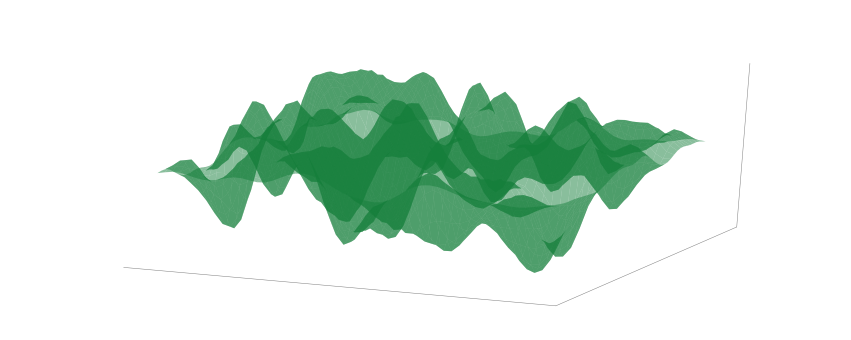

In [41]:
plot_3D_micro(sim);

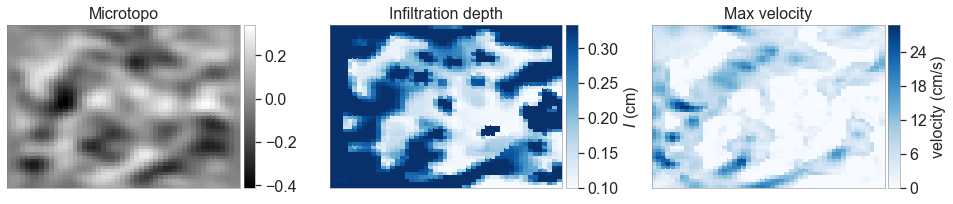

In [42]:
if sim.topo != "plane":
        triptych_micro(sim)

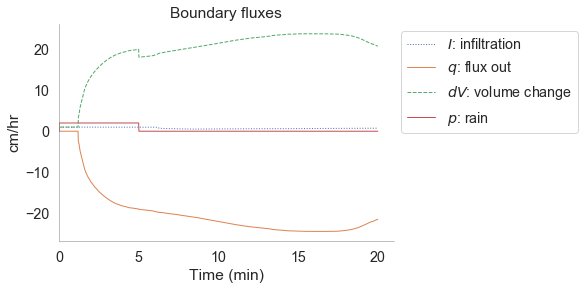

In [43]:
summarize_fluxes(sim);

In [115]:
# arraycolor(sim.vc[sim.i_tr])